In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.utility.h5_serializable_file import H5Serializable
import src.utility.utils as utils 
from uncertainties import ufloat
from src.photometry_data import PhotometryData
from src.utility.run_cfg import ErebusRunConfig
from src.erebus import Erebus
from src.utility.utils import bin_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ErebusRunConfig.save_schema("../src/schema/run_cfg_schema.json")

In [3]:
#lhs1478b = Erebus(ErebusRunConfig.load("./run_cfgs/lhs1478b.yaml"))
trappist1b = Erebus(ErebusRunConfig.load("./run_cfgs/trappist1b.yaml"))
#trappist1c = Erebus(ErebusRunConfig.load("./run_cfgs/trappist1c.yaml"))
#lp79118d = Erebus(ErebusRunConfig.load("./run_cfgs/lp791-18d.yaml"))

Circular orbit: using gaussian prior for t_sec
Visit jw01177008001 was not yet run


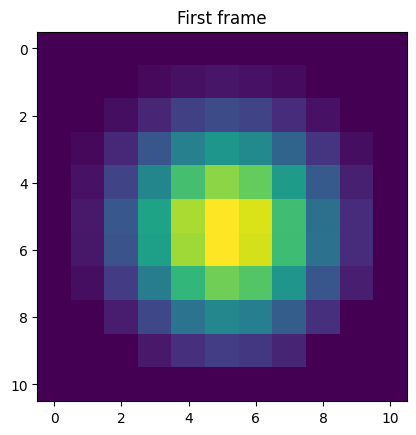

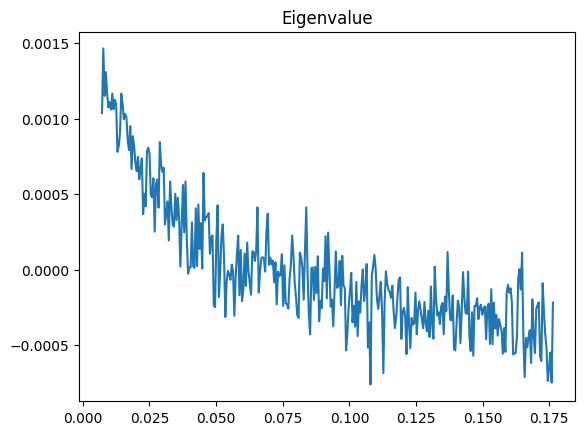

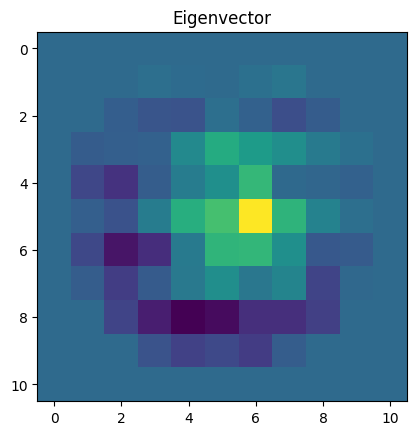

In [4]:
# DO PLOTTING
from src.frame_normalized_pca import perform_fn_pca_on_aperture

fit = trappist1b.results[0]


trappist1b.photometry[0].normalized_frames
plt.imshow(trappist1b.photometry[0].normalized_frames[2])
plt.title("First frame")
plt.show()

eigenvalues = trappist1b.results[0].eigenvalues
eigenvectors = trappist1b.results[0].eigenvectors
time = trappist1b.results[0].time

#eigenvalues, eigenvectors = perform_fn_pca_on_aperture(trappist1b.photometry[0].normalized_frames[10:-10])

plt.plot(time, eigenvalues[0])
plt.title("Eigenvalue")
plt.show()

plt.imshow(eigenvectors[0])
plt.title("Eigenvector")
plt.show()

[1.23357545e-01 2.00000000e-04 2.45977921e+06 8.59000000e-02
 2.08430000e+01 1.51082600e+00 8.97280000e+01 0.00000000e+00
 0.00000000e+00 1.00000000e-01 1.00000000e-01 1.00000000e-01
 1.00000000e-01 1.00000000e-01 0.00000000e+00 0.00000000e+00
 1.00000000e-03 1.00000000e-06]


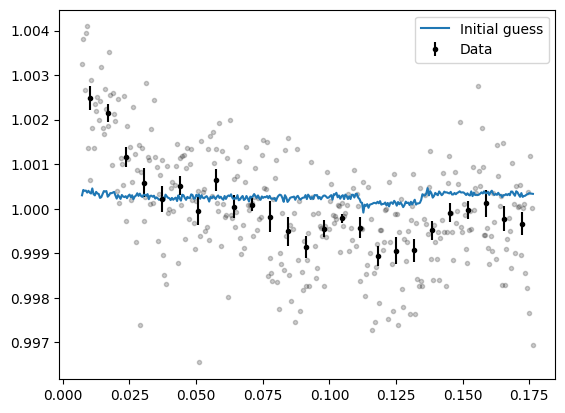

In [5]:
fit = trappist1b.results[0]

flux = fit.raw_flux
binned_flux, binned_flux_err = bin_data(flux, 14)
binned_time, _ = bin_data(time, 14)

mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]
print(initial_guess)
flux_model = fit.fit_method(time, *initial_guess)

plt.plot(time, flux, marker='.', linestyle='', alpha=0.2, color='black')
plt.errorbar(binned_time, binned_flux, yerr=binned_flux_err, marker='.', linestyle='', color='black', label="Data")
plt.plot(time, flux_model, label="Initial guess")
plt.legend()
plt.show()

Initial guesses: [0.12335754548803424, 0.0002, 2459779.210475, 0.0859, 20.843, 1.510826, 89.728, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [1.2589678312014172e-05, 0.000325, 1.25e-05, 0.000185, 0.0775, 3e-06, 0.0825, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 630.9479688484073
Fitting for 15 parameters
Moved away from starting positions
Initial guesses shape: (2, 64, 15)
Mean likelihood after moving: 1912.3765172189087
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:37<00:00, 102.84it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:40<00:00, 99.92it/s]


Rubin gelman convergence: [1.00008182 0.99999865 1.00000447 1.00001014 1.00002606 0.99999861
 1.00029431 1.00205011 1.00025219 1.00029782 0.99999942 0.99999844
 1.0018216  1.00105073 1.00025731] converged? True
Autocorr time: 166.79363077385605 converged? True
Iterations: 10000 Max steps: 100000
Continue looping? False
Autocorr time: 166.79363077385605
{'t_sec': 0.1233589060232981+/-2.4353890608078133e-05, 'fp': 0.0006878556217546411+/-0.00017828911474889912, 't0': 2459779.2104756264+/-2.4748267605900764e-05, 'rp_rstar': 0.08589576729754116+/-0.0003654564595029289, 'a_rstar': 20.84091720975061+/-0.1536527214848462, 'p': 1.5108260506660174+/-5.997269729385302e-06, 'inc': 89.72663450478655+/-0.16383014875651725, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 1.3445863545796661+/-0.24726544855443522, 'pc2': 0.4087267183638563+/-0.1948120122293432, 'pc3': -0.29999041584998487+/-0.30824877603605216, 'pc4': 0.7564615883019542+/-0.30185518156914426, 'pc5': -0.05361445291339421+/-0.3225214539920338, 'ex

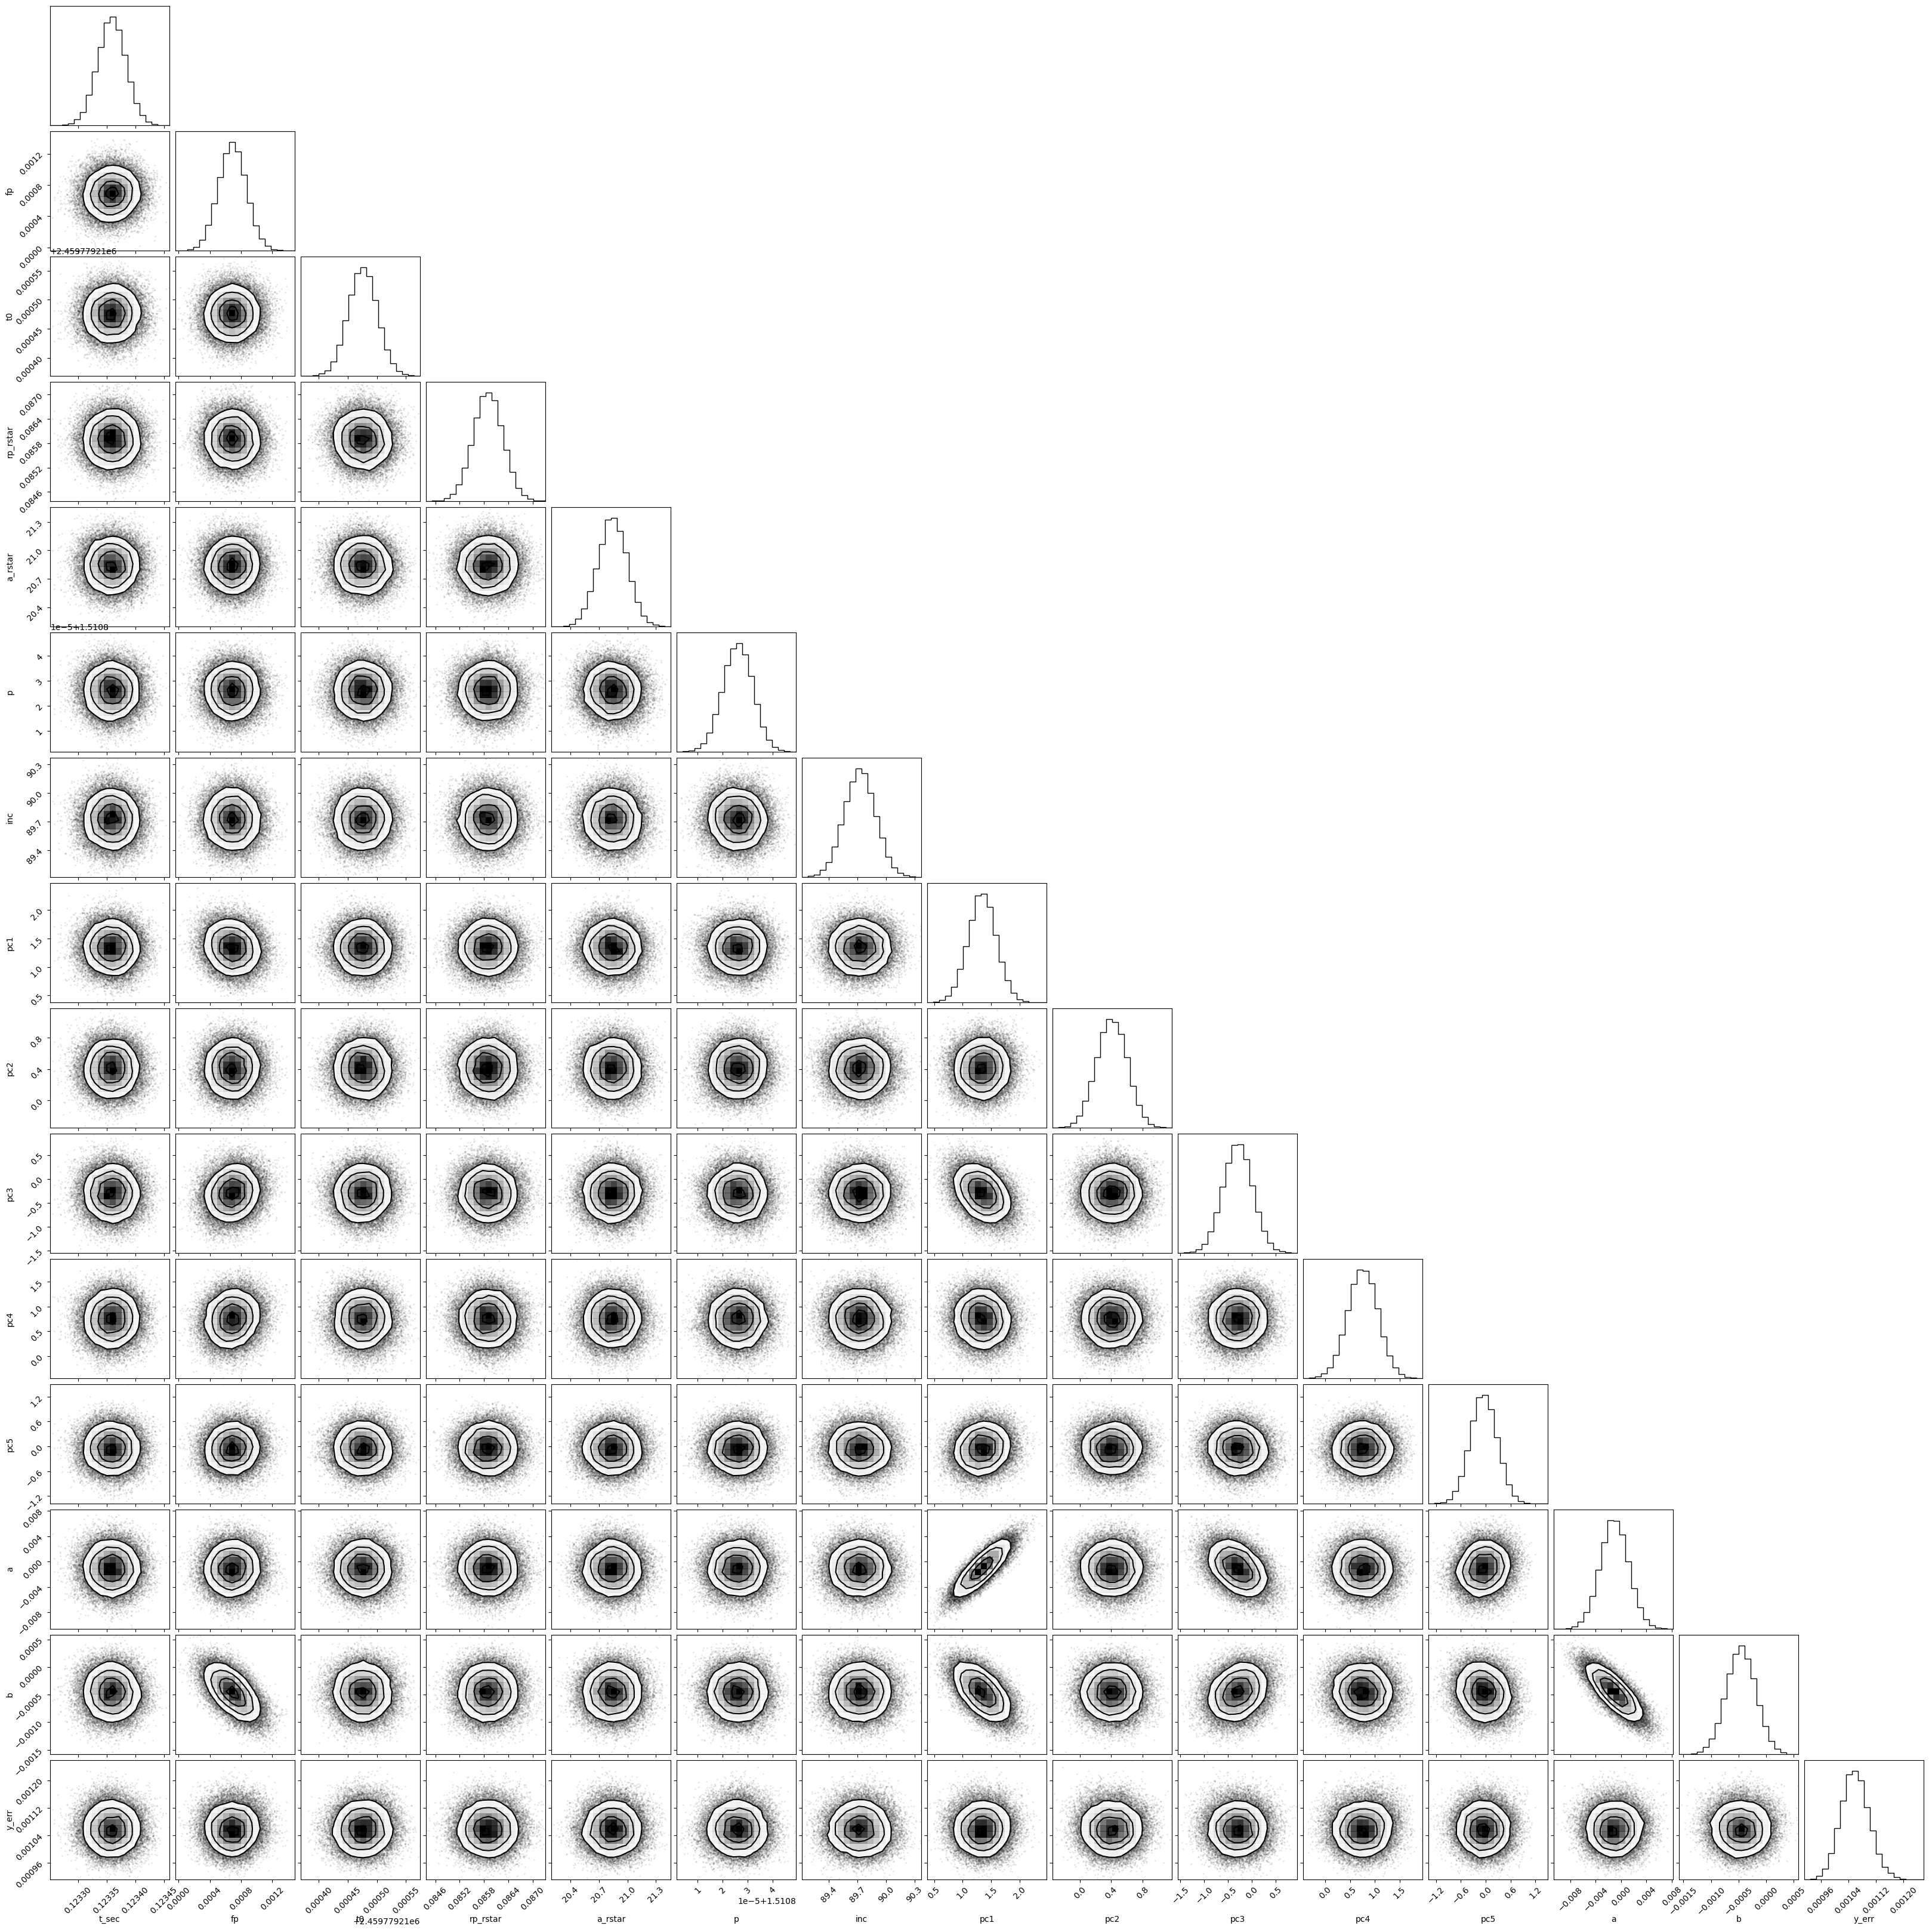

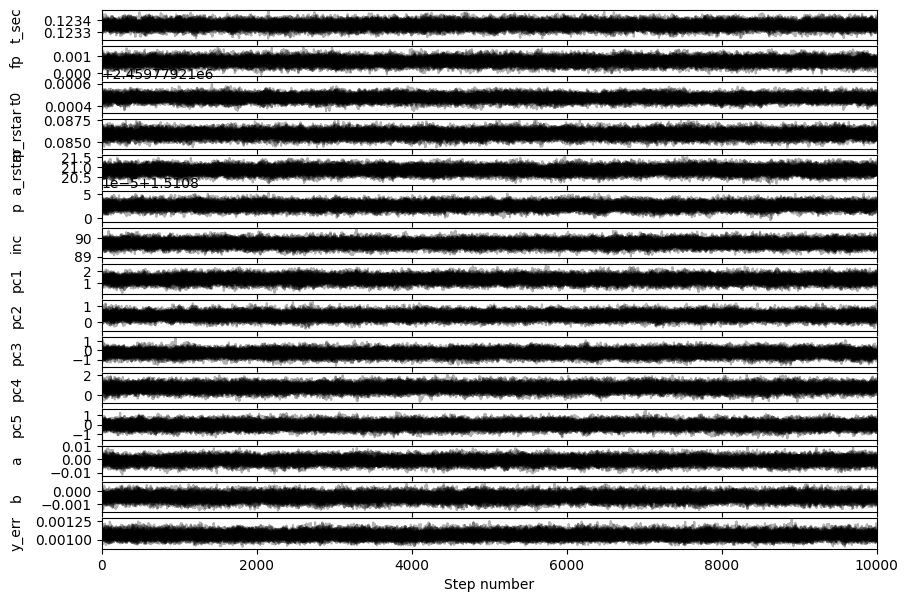

In [6]:
trappist1b.run()

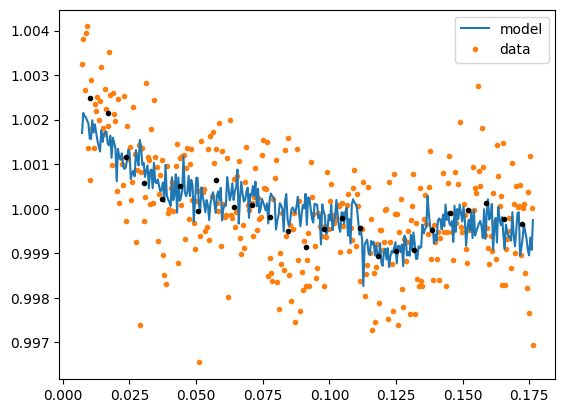

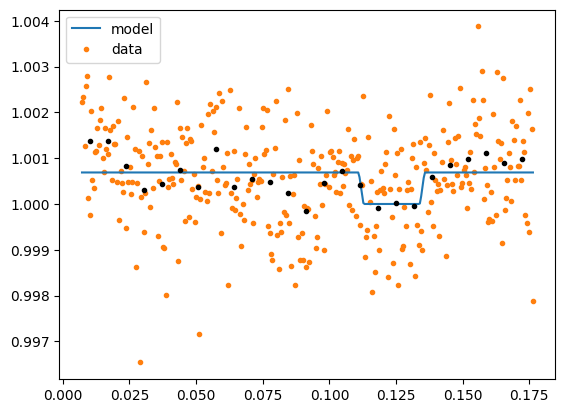

687.8556217546411


In [7]:
import matplotlib.pyplot as plt

fit = trappist1b.results[0]

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
binned_flux, binned_flux_err = bin_data(f, 14)
binned_time, _ = bin_data(t, 14)
f_model = fit.fit_method(t, *res_nominal_values)

plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.plot(binned_time, binned_flux, linestyle='', marker='.', color='black', zorder=4)
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
binned_f_systematic, _ = bin_data(f_systematic, 14)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.plot(binned_time, binned_flux / binned_f_systematic, linestyle='', marker='.', color='black', zorder=4)
plt.legend()
plt.show()

print(res['fp'].nominal_value*1e6)


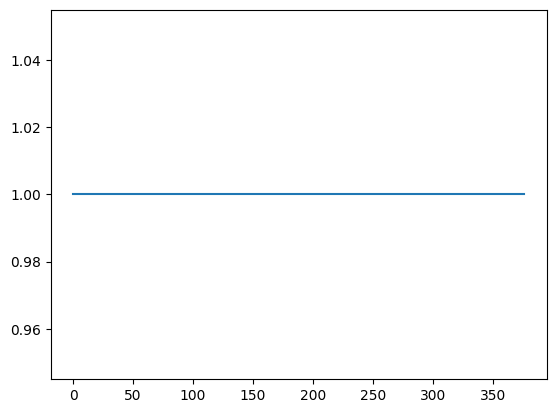

In [8]:
frames = trappist1b.photometry[0].normalized_frames
sums = np.sum(frames, axis=(1,2))
plt.plot(sums)

In [9]:
median = np.median(f / f_systematic)
print(res['fp'].nominal_value*1e6)
print(res['fp'].nominal_value*1e6/median)

687.8556217546411
687.4448809155076
